In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

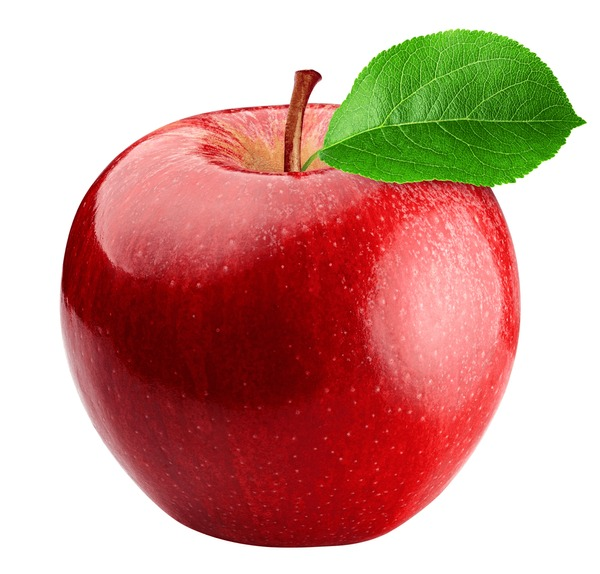

In [ ]:
#to write binarisation code (slide 19) for the next image
url = 'https://www.shutterstock.com/image-photo/red-apple-isolated-on-white-600nw-1727544364.jpg'
image = io.imread(url)
image_5 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_5)


In [ ]:
bw_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

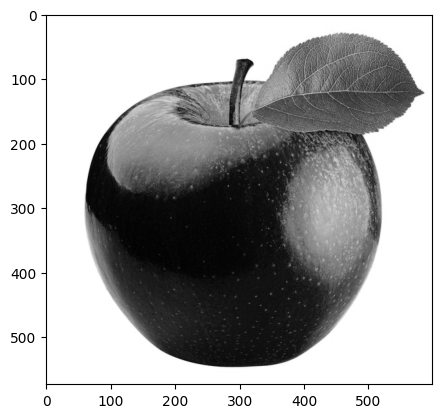

In [ ]:
plt.imshow(bw_image, cmap = "gray")

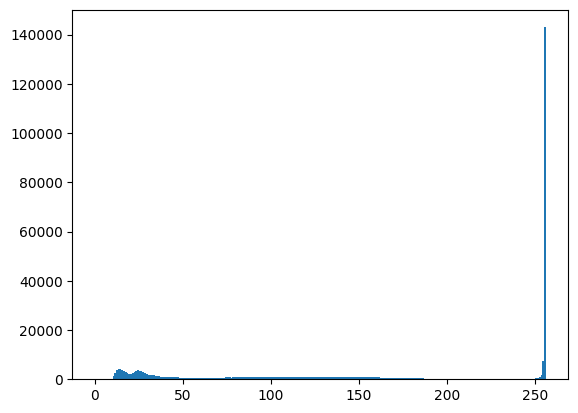

In [ ]:
plt.hist(bw_image.ravel(), 256, [0, 256])
plt.show()

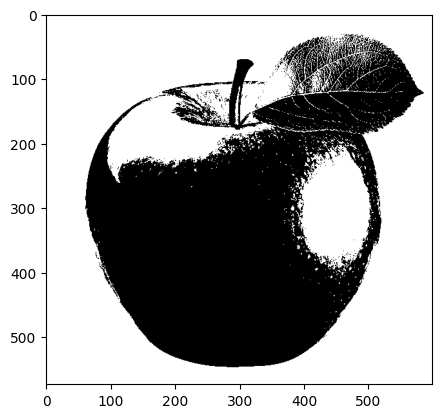

In [ ]:
t1 = 255/2
image_b = (bw_image>t1) *255
plt.imshow(image_b,cmap ="gray")

In [ ]:
bw_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
t2 = np.mean(bw_image)
t2

158.19827235772357

In [ ]:
image_b = (bw_image>t2) *255
plt.imshow(image_b,cmap ="gray")

Task 1
You need to implement the code with binarisation to find appropriate threshold do make image binary
1. Randomly select the initial value of the threshold then
2. Segment the image by the threshold To: regions
G1 and G2 of pixels with values > Then and To
3. Calculate the average values of u1 and u2 for the regions
G1 and G2
4. T1 = 0,5 (u1 + u2)
5. Repeat until / Ti -Ti+1/< Tth

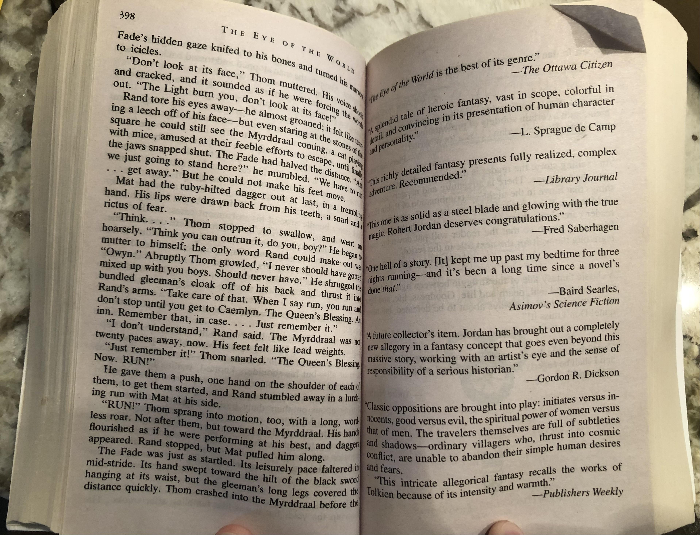

In [3]:
# Getting Image
url = 'https://i.redd.it/cjut2u08qof61.jpg'
image_large = io.imread(url)

image = cv.resize(image_large, (700,535)) # image is too large, so I have to resize it
# cv2_imshow(image)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_rgb)

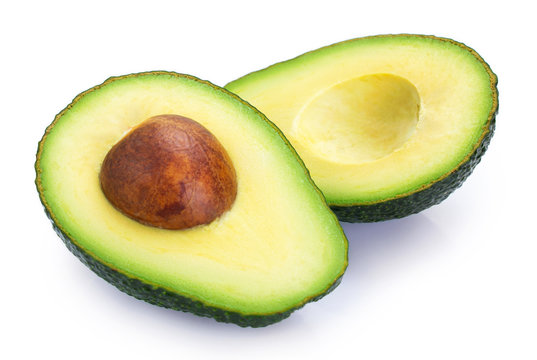

In [6]:
# Getting Image
url = 'https://t3.ftcdn.net/jpg/03/31/32/06/360_F_331320662_RiPnkdLbyLQRFzqSbCSdM5uGkqeaRtRi.jpg'
image = io.imread(url)

# cv2_imshow(image)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_rgb)

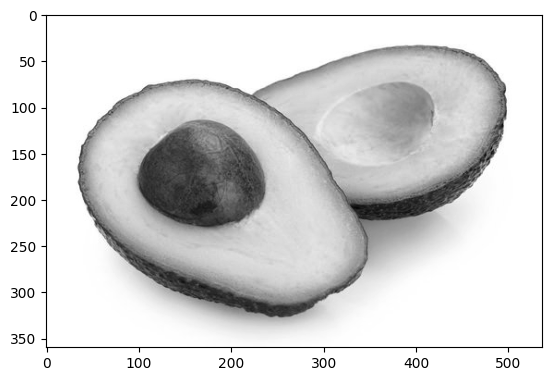

In [56]:
# GrayScale
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = "gray")

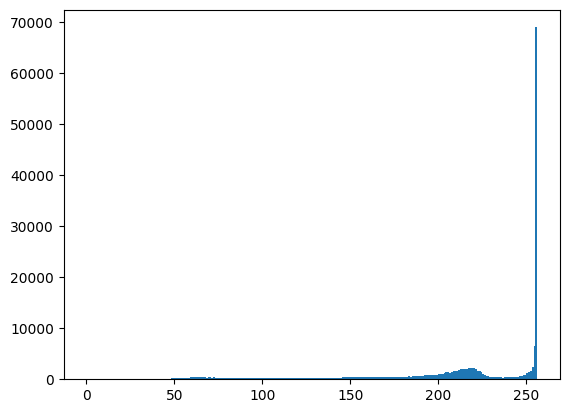

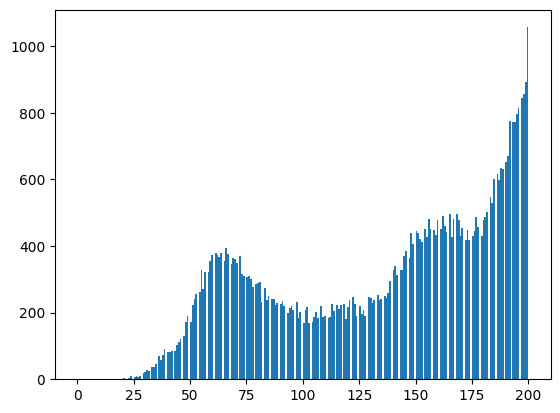

In [84]:
plt.hist(image_gray.ravel(), 256, [0, 256])
plt.show()

plt.hist(image_gray.ravel(), 256, [0, 200])
plt.show()

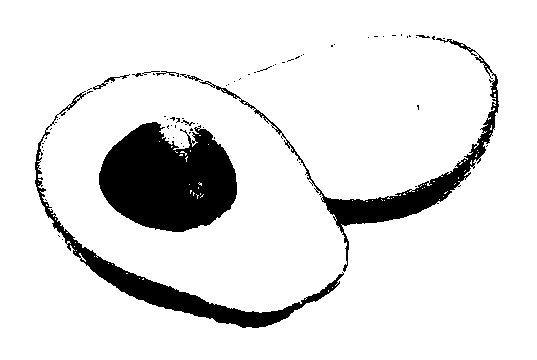

In [85]:
# Randomly select the initial value of the threshold then.
# apply thresholding to convert grayscale to binary image
T0 = 125 # Random value
ret,thresh = cv.threshold(image_gray,T0,255,cv.THRESH_BINARY)
cv2_imshow(thresh)

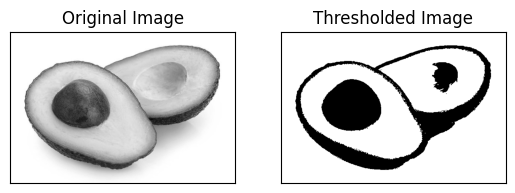

Final threshold value: 173.55292670177687


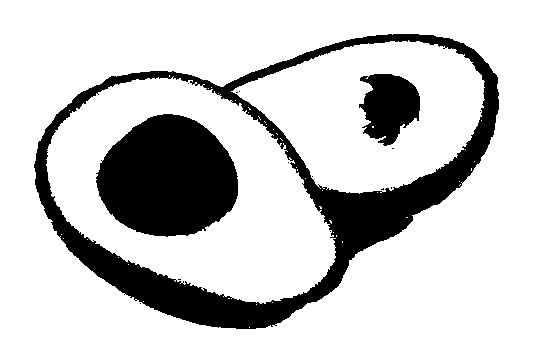

In [86]:
# Tolerance for convergence
epsilon = 0.5

# Maximum number of iterations
counter = 0

while counter < 10000:
    G1 = image_gray > T0 # Segment the image by the threshold To:
    G2 = image_gray <= T0 # regions G1 and G2 of pixels with values > Then and To

    # Calculate the average values of u1 and u2 for the regions G1 and G2
    u1, u2 = np.mean(image_gray[G1]), np.mean(image_gray[G2])

    T1 = (u1 + u2) / 2

    if abs(T1 - T0) < epsilon: # Repeat until / Ti -Ti+1/< Tth
        break

    T0 = T1
    counter += 1

# Apply the final threshold
ret, thresh = cv.threshold(image_gray, T0, 255, cv.THRESH_BINARY)

# Display the original image and the thresholded image
plt.subplot(1, 2, 1), plt.imshow(image_gray, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image'), plt.xticks([]), plt.yticks([])

plt.show()

print(f"Final threshold value: {T0}")

ret,thresh = cv.threshold(image_gray,T0,255,cv.THRESH_BINARY)
cv2_imshow(thresh)
